# Module 5 Capstone Project - A WordCloud for Trump's Tweet

The goal of this project is to develop a wordcloud for Donald Trump's tweets in order to find out which words he used the most in his tweets.

First, we will import the necessary python packages - 

In [ ]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

## Data Source

The data I used for this project is the raw dataset of trump tweets that I found on Kaggle (https://www.kaggle.com/gpreda/trump-tweets). This dataset contains tweets from July 2020 to October 2020. This timeframe allows us to capture the tweets mainly related to the 2020 election and Trump's campaign efforts.

In [ ]:
# Importing the CSV file and converting it to a dataframe
df = pd.read_csv('/content/trump_tweets.csv')

In [ ]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1285299379746811915,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,84262854,50,4,True,2020-07-20 19:43:46,We are United in our effort to defeat the Invi...,NaN,Twitter for iPhone,57356,323246,False
1,1285196013020610562,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,84262854,50,4,True,2020-07-20 12:53:01,"Congratulations Allen, great job! https://t.co...",NaN,Twitter for iPhone,20850,107710,False
2,1284899438591451137,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,84262854,50,4,True,2020-07-19 17:14:33,"So we catch Obama &amp; Biden, not to even men...",NaN,Twitter for iPhone,74707,300712,False
3,1284894845614600194,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,84262854,50,4,True,2020-07-19 16:56:18,"The Radical Left Democrats, who totally contro...",NaN,Twitter for iPhone,39600,160630,False
4,1288503660264058880,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,84328108,50,4,True,2020-07-29 15:56:26,I am in @AirForceOne_HQ flying to the Great St...,NaN,Twitter for iPhone,5727,23432,False


## Data Scrubbing

Next, we will check if the columns, especially the text column which contains the tweets, have null values.

In [ ]:
df.isnull().sum()

id                     0
user_name              0
user_location          0
user_description       0
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            1323
source                 0
retweets               0
favorites              0
is_retweet             0
dtype: int64

It looks like only the hastags column has the null values. It is okay since we will not use this column to generate the wordcloud. In fact, we will drop this column.

In [1]:
# dropping the hashtags column
df.drop(columns=['hashtags'])

NameError: ignored

We will utilize the STOPWORD package in order to remove the stop words in Trump's tweets. We will also add "https" and "CO" to this list. 

In [ ]:
stop_words = ["https", "CO"] + list(STOPWORDS)

Then, we will join all the tweets in the text columns together to feed into the wordcloud.

In [ ]:
tweets = " ".join(line for line in df['text'])


## Importing the Mask Image

Next, we will import the black and white png mask that will be used to generate the shape of the wordcloud.

In [ ]:
# Converting the png image into an array
mask = np.array(Image.open("/content/mask.png"))

# Checking the array values
mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

## Creating the WordCloud

Finally, we can generate the wordcloud. We will use the red and blue as primary colors and white as the background for this wordcloud in order to portray the USA spirit.

In [ ]:
# Add red and blue to the list
colors = ["#BF0A30", "#002868"]

# Creating a colormap by using LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

# Using WordCloud function to create the word cloud
wc = WordCloud(width = 600, height = 400, random_state=1, background_color='white', colormap=cmap , mask=mask, collocations=True, 
               stopwords = stop_words).generate(tweets)

plt.figure(figsize=[15,15])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

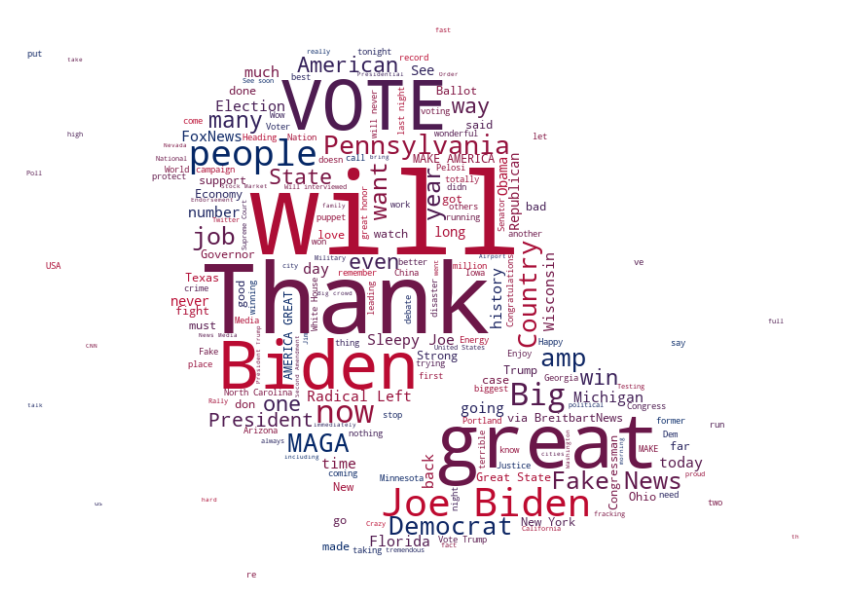